# Técnicas de Amostragem
<h3> Objetivo:</h3>
Este relatório tem como objetivo, a análise de dados sobre a taxa de homicídio no estado do Pará, possuindo divisões de mesorregiões e municípios do estado. Além disso, realizar comparações de três técnicas de amostragens mais comuns, sendo elas:
<ul>
    <li><b>Amostragem Aleatória Simples (AAS)</b></li>
    <li><b>Amostragem Sistemática (AS)</b></li>
    <li><b>Amostragem Estratificada (AE)</b></li>
</ul>
Sendo assim, realizado a análise utilizando os três tipos de técnicas, e comparando entre elas, qual tem maior representatividade com relação aos dados da população.
<br>
<h3>Métodos:</h3>
Para realização da análise foi utilizado as três técnicas mais comuns de amostragem, uma base de dados com informações sobre a taxa de mortalidade de 144 municípios do estado do Pará no ano de 2019(FAPESPA), para fazer o processamento e extração de informação dos dados, foi utilizado a linguagem de programação Python incluindo algumas bibliotecas/módulos para realizar o processamento, sendo:
<ul>
    <li><b>csv:</b> utilizada para fazer leitura de arquivos csv</li>    
    <li><b>math:</b> biblioteca para utilização de algumas funções matemáticas</li>    
    <li><b>matplotlib:</b> biblioteca com uma variedade extensa de opções para plotar gráficos</li>
    <li><b>functools(função reduce):</b> módulo utilizado para aplicar operações em itens de listas</li>
    <li><b>random:</b> utilizada para fazer a seleção de forma aleatória dos dados</li>
</ul>

Além de bibliotecas da linguagem, foi utilizado o `Jupyter Notebook`, ferramenta muito utilizada na área de ciência de dados.


In [32]:
#importação das bibliotecas/móduos a serem utilizados
import csv
import math
import matplotlib.pyplot as plt
from functools import reduce
import random


# Resultados:
O primeiro arquivo de dados utilizado foi o `dados2.csv`, contendo respectivamente as variáveis município, taxa de homicídio e mesorregião pertencente.

In [33]:
with open('dados2.csv', 'r') as dados:
    leitura = csv.reader(dados, delimiter=';')
    matriz_dados = [i for i in leitura]



No primeiro momento foi realizada a análise dos dados da população, para que desta forma, seja possível fazer a comparação com as técnicas de Amostragem Aleatória Simples, Amostragem Sistemática e Amostragem Estratificada.
<h4>Código do bloco a seguir:</h4>
Os valores numéricos foram armazenados em um vetor denominado `numeros`; em seguida existe uma função que realiza o cálculo da média, variância, desvio padrão e o coeficiente de variação; e na última linha do bloco os valores dessas estatísticas populacionais foram armazenadas nas variáveis <b>media_p</b>, <b>variancia_p</b>, <b>desv_padr_p</b>, <b>cv_p</b>.
<br>
<h4>Fórmulas uilizadas:</h4>
<b>$\overline{X}$</b> = $(x_1+x_2+...+x_n)\over N$<br>
<b>$\sigma^2$</b> = $\sum(x_i-\overline{X})^2\over n$ <br>
<b>$\sigma$</b> = $\sqrt{\sigma^2}$<br>
<b>$CV$</b> = $S\over \overline{X}$

In [63]:
#lista contendo os valores da taxa de mortalidade
numeros = list(map(lambda x:float(x), [valor[1] for valor in matriz_dados]))

#estatistica básicas
def estatisticas_basicas(matriz_numeros):
    media = reduce(lambda x, y: x+y, matriz_numeros)/len(matriz_numeros)
    variancia = reduce(lambda x, y: x+(y-media)**2, matriz_numeros, 0)/len(matriz_numeros)
    desv_padr = math.sqrt(variancia)
    cv = desv_padr/media
    return media, variancia, desv_padr, cv

media_p, variancia_p, desv_padr_p, cv_p = estatisticas_basicas(numeros)
media_p, variancia_p, desv_padr_p, cv_p = round(media_p,2), round(variancia_p,2), round(desv_padr_p,2), round(cv_p,2)



Realizando a distribuição de frêquencia por classes para futuramente plotar um histograma, necessitamos de alguns valores como at ou AT que representa a amplitude total da distribuição, k que é o número de classes e h que representa a amplitude de cada classe, onde:
<ul>
    <li><b>$AT$</b> = $X_(min)-X_(max)$</li> <br>
    <li><b>$k$</b> = $\sqrt{n}$</li><br>
    <li><b>$h$</b> = $AT\over k$</li><br>
</ul>

<h4>Codigo do bloco abaixo:</h4>
Realizada a criação de duas funções para obter alguns valores. A função <b>valores_dist_classe</b> calcula a amplitude total (<b>at</b>), o número de classes (<b>k</b>) e a amplitude de cada classe (<b>h</b>). A segunda função, <b>listas_dict_classes</b>, separa em um dicionário o rótulo das classes (chave) e suas frequâncias, uma lista com as amplitudes, e uma lista contendo os pontos médios de cada classe, onde dentro da função é feito uma chamada da função <b>valores_dist_classe</b>, e no final retorna o dicionário de classes e a lista com os pontos médios.

In [35]:
#criação de funções para calcular valores para classes como amplitude total, numero de classes = k e amplitude da classe = h
#Juntamente a uma função para separar um dicionário para armazenar as classes e amplitudes com suas respectivas frequencias,
#Uma lista contendo as amplitudes de classe, e uma lista com os pontos médios de cada classe

def valores_dist_classe(matriz_numeros):
    at = max(matriz_numeros) - min(matriz_numeros)
    k = int(round(math.sqrt(len(matriz_numeros))))
    h = math.ceil(at/k)
    return k, h


def listas_dict_classes(matriz_numeros):
    classes = {}
    amplitudes = []
    ponto_medio = []
    k, h = valores_dist_classe(matriz_numeros)
    for i in range(k):
        if len(amplitudes) == 0:
            amplitudes.append(min(matriz_numeros))
        else:
            amplitudes.append(amplitudes[i-1]+h)

    for i in range(len(amplitudes)):
        if i < k-1:
            classes[f'{amplitudes[i]}|---{amplitudes[i+1]}'] = len(
                [x for x in matriz_numeros if x >= amplitudes[i] and x < amplitudes[i+1]])
            ponto_medio.append((amplitudes[i]+amplitudes[i+1])/2)
        else:
            classes[f'{amplitudes[i]}|---{amplitudes[i]+h}'] = len(
                [x for x in matriz_numeros if x >= amplitudes[i] and x < amplitudes[i]+h])
            ponto_medio.append(((amplitudes[i]+(amplitudes[i]+h))/2))
    
    return classes,  ponto_medio

classes_p, ponto_medio_p = listas_dict_classes(numeros)


Tabela 1: Distribuição de frequência por classes da população.

In [36]:
print('Tabela 1: Distribuição de frequência por classes da população')
print()
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_p.items():
    print(f'{i:^13} | {j:>4}')


Tabela 1: Distribuição de frequência por classes da população

   Classes    |  Fi 
--------------|-----
 0.0|---3.0   |    5
 3.0|---6.0   |    7
 6.0|---9.0   |   16
 9.0|---12.0  |   21
12.0|---15.0  |   26
15.0|---18.0  |   27
18.0|---21.0  |   21
21.0|---24.0  |    4
24.0|---27.0  |   13
27.0|---30.0  |    3
30.0|---33.0  |    1
33.0|---36.0  |    0


Para a população foram obtidas 12 classes com uma amplitude (h) = 3, onde a classe 15|---18 apresentam a maior frequência, e a classe 33|---36 apresentam a menor frequência de classe.

In [37]:
#define o estilo do gráfico para ggplot
plt.style.use("ggplot")

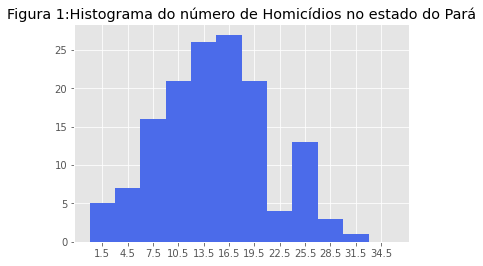

In [38]:
#plotagem do histograma
plt.bar(ponto_medio_p, [t for t in classes_p.values()], 3, color='#4B6BEA')
plt.title('Figura 1:Histograma do número de Homicídios no estado do Pará')
plt.xticks(ponto_medio_p)
plt.show()


In [39]:
#calcular o a quantidade da amostra "n"
n = (math.pow(1.96, 2)*math.pow(variancia_p, 2))/(sum(numeros) *
                                                0.05+math.pow(1.96, 2)*math.pow(variancia_p, 2)/sum(numeros))
n = math.ceil(n)



Antes de iniciar as análises com as técnicas de amostragem, foi feito o cálculo do valor de n, que representa a quantidade da amostra, utilizando a seguinte fórmula:
<br>
$n = \frac{Z^2*\sigma^2}{d^2 + \frac{Z^2*\sigma^2}{N}} = \frac{1.96^2*40.9^2}{105.35^2 + \frac{1.96^2*40.9^2}{2107.01}} = 60$<br><br>
Utilizando um $z = 1,96$, $d = 105.35$.

# Amostragem Aleatória Simples
A amostragem aleatória simples consiste em selecionar de forma aleatória as amostras e aplicar as análises sobre a amostra coletada, no caso em questão temos um n = 60, logo, foi extraído uma amostra de 60 baseado na população dos dados utilizados.

In [40]:
with open('dados2.csv', 'r') as arquivo:
    ler = csv.reader(arquivo, delimiter=';')
    populacao = [entrada for entrada in ler]



In [41]:
#selecionando a amostra
random.seed(30)
amostra_aas = random.sample(populacao, 60)



A função random utilizada acima irá separar uma amostra sem reposição de tamanho n = 60

In [42]:
#adicionando os dados da amostra em um dicionário para verificar quantas quais e quantas mesoregiões fazem parte da amostra
def cont_mesoreg(matriz_amostra):
    mesoregioes_selec = [item[2] for item in matriz_amostra]
    mesoreg = {
        'Baixo Amazonas': mesoregioes_selec.count('Baixo Amazonas'),
        'Marajo':mesoregioes_selec.count('Marajo'),
        'Metropolitana de Belem': mesoregioes_selec.count('Metropolitana de Belem'),
        'Nordeste Paraense': mesoregioes_selec.count('Nordeste Paraense'),
        'Sudoeste Paraense': mesoregioes_selec.count('Sudoeste Paraense'),
        'Sudeste Paraense': mesoregioes_selec.count('Sudeste Paraense'),
    }
    return mesoreg
mesoreg_selec_aas = cont_mesoreg(amostra_aas)



Na amostragem aleatória simples obtivemos a seguinte tabela:

<table>
    <caption>Tabela 2: quantidade de municipios selecionados por mesoregião</caption>
    <tr>
        <th>Região</th>
        <th>Quantidade</th>
    </tr>
    <tr>
        <td>Baixo Amazonas</td>
        <td>{{mesoreg_selec_aas['Baixo Amazonas']}}</td>
    </tr>
    <tr>
        <td>Marajo</td>
        <td>{{mesoreg_selec_aas['Marajo']}}</td>
    </tr>
    <tr>
        <td>Metropolitana de Belem</td>
        <td>{{mesoreg_selec_aas['Metropolitana de Belem']}}</td>
    </tr>
    <tr>
        <td>Nordeste Paraense</td>
        <td>{{mesoreg_selec_aas['Nordeste Paraense']}}</td>
    </tr>
    <tr>
        <td>Sudoeste Paraense</td>
        <td>{{mesoreg_selec_aas['Sudoeste Paraense']}}</td>
    </tr>
    <tr>
        <td>Sudeste Paraense</td>
        <td>{{mesoreg_selec_aas['Sudeste Paraense']}}</td>
    </tr>
</table>

Novamente é feita a utilização das funções criadas para gerar a ditribuição de frequências por classe

In [43]:
#coletando somente a lista de números da amostra juntamente as estatísticas básicas
numeros_aas = list(map(lambda x:float(x), [item[1] for item in amostra_aas]))

media_aas, variancia_aas, desv_padr_aas, cv_aas = estatisticas_basicas(numeros_aas)


In [44]:
#utilizando a função criada para desenvolver o dicionario com as classes e suas respectivas frequencias e uma lista com os pontos médios
classes_aas, ponto_medio_aas = listas_dict_classes(numeros_aas)



In [45]:
print('Tabela 3: Distribuição de frequência por classes da população (AAS)')
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_aas.items():
    print(f'{i:^13} | {j:>4}')

Tabela 3: Distribuição de frequência por classes da população (AAS)
   Classes    |  Fi 
--------------|-----
 0.0|---4.0   |    1
 4.0|---8.0   |    8
 8.0|---12.0  |   12
12.0|---16.0  |   21
16.0|---20.0  |   11
20.0|---24.0  |    2
24.0|---28.0  |    5
28.0|---32.0  |    0


Na AAS, diferente da análise da população, foram obtidas somente 8 classes, com um h = 4.

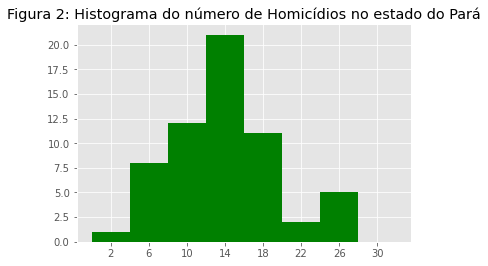

In [46]:
#plotagem do histograma
plt.bar(ponto_medio_aas, [t for t in classes_aas.values()],4, color='green')
plt.title('Figura 2: Histograma do número de Homicídios no estado do Pará')
plt.xticks(ponto_medio_aas)
plt.show()

# Amostragem Sistemática
Na amostragem sistemática a seleção da amostra é feita de forma ordenada, geralmente utilizando dados de forma ordenada, para esse caso de amostragem sistemática, foi necesário ordenar os dados em ordem crescente utilizando a coluna de taxa de homicídios, então o arquivo utilizado foi <b>dados2_ordenado.csv</b>.

In [47]:
#utilizando o arquivo .csv com os dados ordenados da menor taxa de homicio para a maior taxa.
with open('dados2_ordenado.csv', 'r') as arquivo:
    ler = csv.reader(arquivo, delimiter =';')
    populacao_ord = [item for item in ler]


In [64]:
#calculando o valor de K para verificar a distancia dos intervalos e deciasão do inicio da selação atarvés do r
k_as = round(len(populacao_ord)/n)
r = random.randint(1,k_as)
posicoes_amostras = [r]
for posicao in range(1,n):
    posicoes_amostras.append(r+posicao*k_as)


Dois valores precisam ser calculados para realizar a amostragem, são eles, K (intervalo do índice de cada amostra) e r que representa o índice inicial.
Para chegar aos valores utilizamos as seguintes fórmulas:<br>
$K = \frac{N}{n} = \frac{144}{60} = 2.4$<br>
Como o valor de $K$ precisa ser inteiro, então arrendonda-se para $K = $ {{k_as}}.<br>
o $r$ é um valor que deve ser selecionado baseado na seguinte regra, ele deve ser um número aleatório onde, $1\leq r\leq K$, logo, $1\leq r \leq$ {{k_as}}.
<br>
<h4>Código do bloco abaixo</h4>
É utilizada a lista criada no bloco anterior, <b>posicoes_amostra</b>, para relacionar os índices e de uma lista com a outra, e armazenar somente os valores da amostra selecionada.

In [49]:
amostra_as =[]
for seletor in posicoes_amostras:
    amostra_as.append(populacao_ord[seletor])


In [50]:
mesoreg_select_as = cont_mesoreg(amostra_as)



Na amostragem sistemática obtivemos os seguintes municípios de cada mesoregião:
<table>
    <caption>Tabela 4: quantidade de municipios selecionados por mesoregião</caption>
    <tr>
        <th>Região</th>
        <th>Quantidade</th>
    </tr>
    <tr>
        <td>Baixo Amazonas</td>
        <td>{{mesoreg_select_as['Baixo Amazonas']}}</td>
    </tr>
    <tr>
        <td>Marajo</td>
        <td>{{mesoreg_select_as['Marajo']}}</td>
    </tr>
    <tr>
        <td>Metropolitana de Belem</td>
        <td>{{mesoreg_select_as['Metropolitana de Belem']}}</td>
    </tr>
    <tr>
        <td>Nordeste Paraense</td>
        <td>{{mesoreg_select_as['Nordeste Paraense']}}</td>
    </tr>
    <tr>
        <td>Sudoeste Paraense</td>
        <td>{{mesoreg_select_as['Sudoeste Paraense']}}</td>
    </tr>
    <tr>
        <td>Sudeste Paraense</td>
        <td>{{mesoreg_select_as['Sudeste Paraense']}}</td>
    </tr>
</table>

In [51]:
#separando os valores numericos da matriz
numeros_as = list(map(lambda x:float(x),[item[1] for item in amostra_as]))
media_as, variancia_as, desv_padr_as, cv_as = estatisticas_basicas(numeros_as)\


In [52]:
#criação do dicionário para armazenamento das classes e da lista de pontos médios
classes_as, ponto_medio_as = listas_dict_classes(numeros_as)


In [53]:
print('Tabela 5: Distribuição de frequência por classes da população (AS)')
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_as.items():
    print(f'{i:^13} | {j:>4}')

Tabela 5: Distribuição de frequência por classes da população (AS)
   Classes    |  Fi 
--------------|-----
 0.0|---3.0   |    2
 3.0|---6.0   |    4
 6.0|---9.0   |    8
 9.0|---12.0  |   10
12.0|---15.0  |   13
15.0|---18.0  |   14
18.0|---21.0  |    9
21.0|---24.0  |    0


Na amostragem sistemática foram geradas somente 8 classes, assim como na AAS, porém com um h = 3.

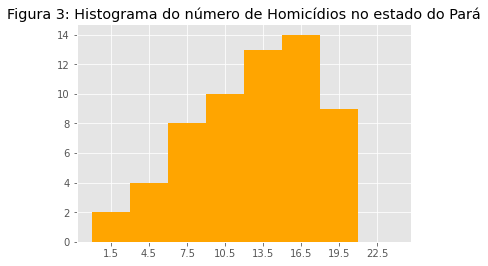

In [54]:
#plotagem do histograma
plt.bar(ponto_medio_as, [t for t in classes_as.values()],3, color='orange')
plt.title('Figura 3: Histograma do número de Homicídios no estado do Pará')
plt.xticks(ponto_medio_as)
plt.show()

# Amostragem Estratificada (AE)
Na Amostragem estratificada, existem alguns estratos, onde as quantidades existentes em cada estrato é diferente, no caso em questão os estratos são as mesoregiões, que possuem quantidades diferentes de municípios, e a AE busca igualar de forma proporcional as amostras dentro de cada estrato.

In [55]:
#saparação dos grupos em mesoregião (Baixo Amazonas, Marajo, Metropolitana de Belem, Nordeste Paraense, Sudoeste Paraense, Sudeste Paraense)
def separar_blocos(matriz, nome_procurar, posicao):
    lista = [item for item in matriz if nome_procurar in item]
    return lista

meso_ba = separar_blocos(populacao, 'Baixo Amazonas', 2)
meso_m = separar_blocos(populacao, 'Marajo', 2)
meso_mb = separar_blocos(populacao, 'Metropolitana de Belem', 2)
meso_np = separar_blocos(populacao, 'Nordeste Paraense', 2)
meso_sudo_pa = separar_blocos(populacao, 'Sudoeste Paraense', 2)
meso_sudes_pa = separar_blocos(populacao, 'Sudeste Paraense', 2)


Como precisamos separar os estratos, foi criado 6 listas, onde cada uma representa uma mesoregião De cada lista será coletado de forma proporcional as amostras totalizando um n = 60.

In [56]:
#extração de cada estrato para uma unica lista utilizando função
def extrair(matriz):
    lista_provisoria = random.sample(
        matriz, round((len(matriz)/len(populacao)*n)))
    return lista_provisoria


amostra_ae = extrair(meso_ba) + extrair(meso_m) + extrair(meso_mb) + \
    extrair(meso_np) + extrair(meso_sudo_pa) + extrair(meso_sudes_pa)


In [57]:
mesoreg_select_ae = cont_mesoreg(amostra_ae)


<table>
    <caption>Tabela 6: Mesoregiões do estado do Pará</caption>
    <tr>
        <th>Mesoregiões</th>
        <th>Nº de municípios por Mesoregião</th>
        <th>Proporção em relação ao universo</th>
        <th>Tamanho da amostra correspondente</th>
    </tr>
    <tr>
        <td>Baixo Amazonas</td>
        <td>{{len(meso_ba)}}</td>
        <td>{{round(len(meso_ba)/len(numeros,),2)}}</td>
        <td>{{round(round(len(meso_ba)/len(numeros,),2)*60)}}</td>
    </tr>
    <tr>
        <td>Marajo</td>
        <td>{{len(meso_m)}}</td>
        <td>{{round(len(meso_m)/len(numeros,),2)}}</td>
        <td>{{round(round(len(meso_m)/len(numeros,),2)*60)}}</td>
    </tr>
    <tr>
        <td>Metropolitana de Belem</td>
        <td>{{len(meso_mb)}}</td>
        <td>{{round(len(meso_mb)/len(numeros,),2)}}</td>
        <td>{{round(round(len(meso_mb)/len(numeros,),2)*60)}}</td>
    </tr>
    <tr>
        <td>Nordeste Paraense</td>
        <td>{{len(meso_np)}}</td>
        <td>{{round(len(meso_np)/len(numeros,),2)}}</td>
        <td>{{round(round(len(meso_np)/len(numeros,),2)*60)}}</td>
    </tr>
    <tr>
        <td>Sudoeste Paraense</td>
        <td>{{len(meso_sudo_pa)}}</td>
        <td>{{round(len(meso_sudo_pa)/len(numeros,),2)}}</td>
        <td>{{round(round(len(meso_sudo_pa)/len(numeros,),2)*60)}}</td>
    </tr>
    <tr>
        <td>Sudeste Paraense</td>
        <td>{{len(meso_sudes_pa)}}</td>
        <td>{{round(len(meso_sudes_pa)/len(numeros,),2)}}</td>
        <td>{{round(round(len(meso_sudes_pa)/len(numeros,),2)*60)}}</td>
    </tr>
</table>

In [58]:
#separar os valores numericos da amostra e descrevendo estatisticas basicas sobre a amostra
numeros_ae = list(map(lambda x:float(x),[item[1] for item in amostra_ae]))
media_ae, variancia_ae, desv_padr_ae, cv_ae = estatisticas_basicas(numeros_ae)




In [59]:
#criação do dicionário para armazenamento das classes e da lista de pontos médios
classes_ae, ponto_medio_ae = listas_dict_classes(numeros_ae)


In [60]:
print('Tabela 7: Distribuição de frequência por classes da população (AS)')
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i, j in classes_ae.items():
    print(f'{i:^13} | {j:>4}')

Tabela 7: Distribuição de frequência por classes da população (AS)
   Classes    |  Fi 
--------------|-----
 0.0|---4.0   |    3
 4.0|---8.0   |    6
 8.0|---12.0  |   15
12.0|---16.0  |   19
16.0|---20.0  |   11
20.0|---24.0  |    2
24.0|---28.0  |    3
28.0|---32.0  |    1


Assim como nas outras técnicas, na AE foram formadas 8 classes com um h = 4.

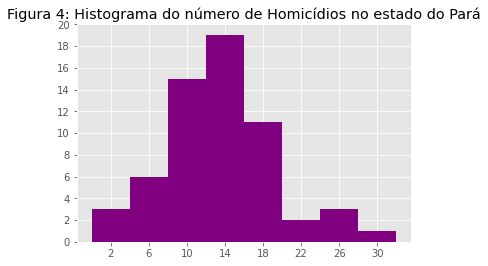

In [61]:
#plotagem do histograma
plt.bar(ponto_medio_ae, [t for t in classes_ae.values()],4, color='purple')
plt.title('Figura 4: Histograma do número de Homicídios no estado do Pará')
plt.xticks(ponto_medio_ae)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

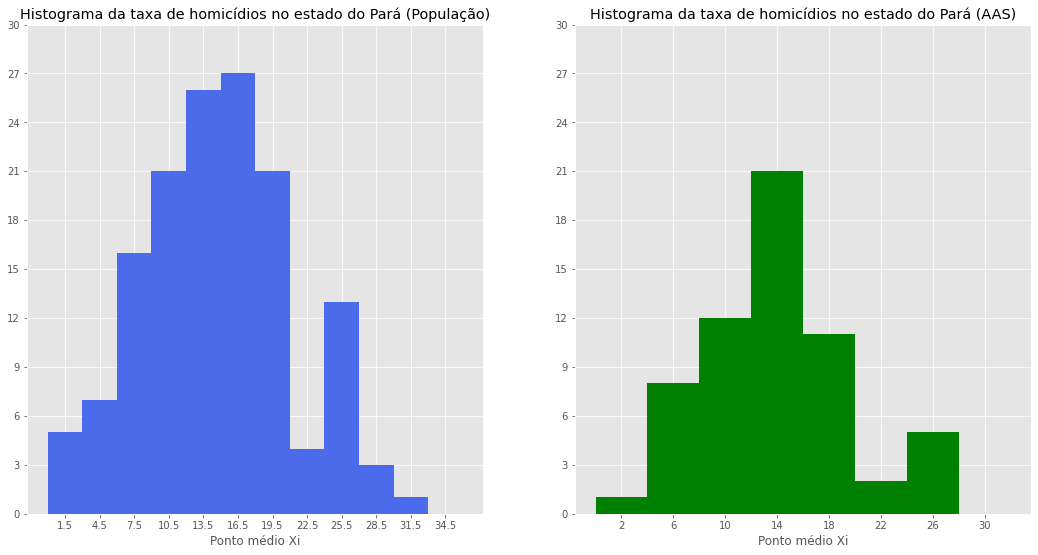

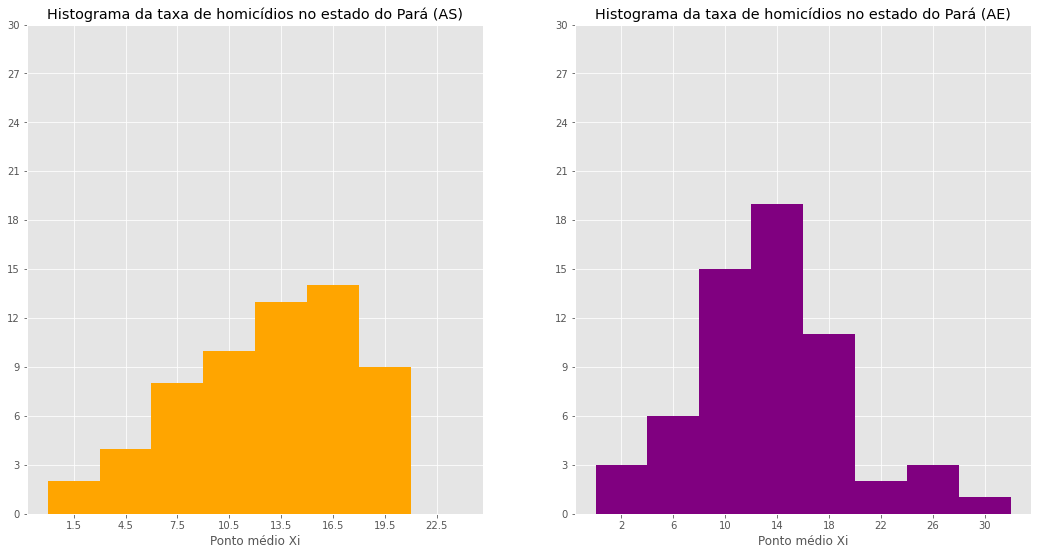

In [62]:
fig, (x1, x2) = plt.subplots(1, 2, figsize=(18,9))
fig2, (x3, x4) = plt.subplots(1, 2, figsize=(18,9))

x1.bar(ponto_medio_p, [t for t in classes_p.values()], 3, color='#4B6BEA')
x1.set(title = 'Histograma da taxa de homicídios no estado do Pará (População)',xlabel = 'Ponto médio Xi',xticks=ponto_medio_p, yticks=[0,3,6,9,12,15,18,21,24,27,30])
#x1.xticks(ponto_medio_as)

x2.bar(ponto_medio_aas, [t for t in classes_aas.values()],4, color='green')
x2.set(title = 'Histograma da taxa de homicídios no estado do Pará (AAS)',xlabel = 'Ponto médio Xi', xticks=ponto_medio_aas, yticks=[0,3,6,9,12,15,18,21,24,27,30])
#x2.xticks(ponto_medio_ae)
#x2.yticks([0,3,6,9,12,15,18,21,24,27,30,33])

x3.bar(ponto_medio_as, [t for t in classes_as.values()],3, color='orange')
x3.set(title = 'Histograma da taxa de homicídios no estado do Pará (AS)',xlabel = 'Ponto médio Xi', xticks=ponto_medio_as, yticks=[0,3,6,9,12,15,18,21,24,27,30])

x4.bar(ponto_medio_ae, [t for t in classes_ae.values()],4, color='purple')
x4.set(title = 'Histograma da taxa de homicídios no estado do Pará (AE)',xlabel = 'Ponto médio Xi', xticks=ponto_medio_ae, yticks=[0,3,6,9,12,15,18,21,24,27,30])

plt.show()

<h4>Comparação das técnicas</h4>
Após applicar as 3 técnicas, podemos analisar cada uma e comparar com as informações e o histograma gerado para cada uma. Primeiramente comparando a média, variância, desvio padrão e o coeficiente de variância da população com a amostragem aleatoria simples, obtemos uma diferença absoluta da média = {{round(abs(media_p - media_aas),2)}}, da vavariância  = {{round(abs(variancia_p - variancia_aas),2)}}, do desvio padrão = {{round(abs(desv_padr_p - desv_padr_aas),2)}} e do cv = {{round(abs(cv_p - cv_aas),2)}}. Fazendo a mesma comparação com a amostragem sistemática obtêm-se, uma diferença absoluta da média = {{round(abs(media_p - media_as),2)}}, da vavariância  = {{round(abs(variancia_p - variancia_as),2)}}, do desvio padrão = {{round(abs(desv_padr_p - desv_padr_as),2)}} e do cv = {{round(abs(cv_p - cv_as),2)}}. E com a amostragem estratificada foi obtido uma diferença absoluta da média = {{round(abs(media_p - media_ae),2)}}, da vavariância  = {{round(abs(variancia_p - variancia_ae),2)}}, do desvio padrão = {{round(abs(desv_padr_p - desv_padr_ae),2)}} e do cv = {{round(abs(cv_p - cv_ae),2)}}. Assim formando a Tabela 8:
<br>
<table>
    <caption>Tabela 8: Diferença absoluta das estatísticas das técnicas versus população</caption>
    <tr>
        <th>Técnicas</th>
        <th>Diferença Absouta Média</th>
        <th>Diferença Absouta Variância</th>
        <th>Diferença Absouta Desvio Padrão</th>
        <th>Diferença Absouta Coeficiente de Variação</th>
    </tr>
    <tr>
        <td>Amostragem Aleatória Simples</td>
        <td>{{round(abs(media_p - media_aas),2)}}</td>
        <td>{{round(abs(variancia_p - variancia_aas),2)}}</td>
        <td>{{round(abs(desv_padr_p - desv_padr_aas),2)}}</td>
        <td>{{round(abs(cv_p - cv_aas),2)}}</td>
    </tr>
    <tr>
        <td>Amostragem Sistemática</td>
        <td>{{round(abs(media_p - media_as),2)}}</td>
        <td>{{round(abs(variancia_p - variancia_as),2)}}</td>
        <td>{{round(abs(desv_padr_p - desv_padr_as),2)}}</td>
        <td>{{round(abs(cv_p - cv_as),2)}}</td>
    </tr>
    <tr>
        <td>Amostragem Estratificada</td>
        <td>{{round(abs(media_p - media_ae),2)}}</td>
        <td>{{round(abs(variancia_p - variancia_ae),2)}}</td>
        <td>{{round(abs(desv_padr_p - desv_padr_ae),2)}}</td>
        <td>{{round(abs(cv_p - cv_ae),2)}}</td>
    </tr>
</table>

# Conclusão
Levando em consideração a <b>Tabela 8</b> e as figuras dos histogramas gerados, para a população e para as técnicas em relação a taxa de homicídios no estado do Pará, é possível concluir que a Amostragem Estratificada possui as menores diferenças absolutas em comparação com a população, e o histograma com uma curva mais aproximada ao da população, tonando a amostra mais representativa à população, seguido da amostragem aleatória simples, que possui a segunda menor diferença absoluta das estatísticas. A amostragem sistemática foi a amostragem menos representativa para os dados, pois possui uma diferença abosluta para variancia alta e um historama que não se assemelha ao da população.